In [663]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as smf
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 500)

%matplotlib inline

In [708]:
estimate = pd.read_csv('E:/Transit-Casa-Alex/MUNI Rail/Output/Modeling/2009/Quarter_Data.csv',thousands = ',')

In [709]:
estimate['FREQ_S'] = 1 / (estimate['HEADWAY_S'] / 60.0)

In [710]:
estimate['NUM_BUS_STOPS'] = estimate['NUM_BUS_STOPS'] - 1

In [711]:
max(estimate.RUNSPEED_S)

27.25

In [712]:
max(estimate.TOTSPEED_S)

27.25

In [713]:
min(estimate.TOTSPEED_S)

0.0

In [714]:
min(estimate.RUNSPEED_S)

0.0

In [715]:
drop = ['Unnamed: 0',
'STOP_LAT_x',
'STOP_LON_x',
'STOP_LAT_y',
'STOP_LON_y',
'geometry',
'index_right',
'ALAND00',
'AWATER00',
'COUNTYFP00',
'CTIDFP00',
'NAME00',
'TRACTCE00',
'Id',
'Id2',
'Geography',
'geometry_e',
'geometry_f',
'STOP_LAT',
'STOP_LON',
'FID_1']

In [716]:
estimate = estimate.drop(drop,axis = 1)

In [717]:
change = ['BART_FROMS','BART_TOS','ON_BUS','OFF_BUS','CALTRAIN_OFF','CALTRAIN_ON','NUM_BUS_STOPS']

In [718]:
for column in change:
    estimate[column] = estimate[column].fillna(0)

In [719]:
estimate.columns

Index(['ROUTE_SHORT_NAME', 'STOP_ID', 'DIR', 'SEQ', 'HEADWAY_S', 'EOL', 'SOL',
       'DWELL_S', 'RUNTIME_S', 'TOTTIME_S', 'SERVMILES_S', 'RUNSPEED_S',
       'TOTSPEED_S', 'Route', 'STOP', 'Boardings', 'Alightings', 'STOP NAME_x',
       'STOP NAME_y', 'Total_Pop', 'Total_Housing_Units',
       'Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)', 'VAC_RATE',
       'OCC_RATE', 'PER_INCOME_0-15', 'PER_INCOME_15-50', 'PER_INCOME_50-100',
       'PER_INCOME_100+', 'AVG_HH_SIZE', 'PER_HH_0VEH', 'POP_DEN_ACS',
       'HH_DEN_ACS', 'HU_DEN_ACS', 'BART_TOS', 'BART_FROMS', 'CALTRAIN_OFF',
       'CALTRAIN_ON', 'ON_BUS', 'HEADWAY_S_BUS', 'ONTIME5_BUS', 'OFF_BUS',
       'NUM_BUS_STOPS', 'EDHLTH_RAC_SCALED', 'EDHLTH_WAC_SCALED',
       'EMP_RAC_SCALED', 'EMP_WAC_SCALED', 'LEISER_RAC_SCALED',
       'LEISER_WAC_SCALED', 'OTHER_RAC_SCALED', 'OTHER_WAC_SCALED',
       'RETAIL_RAC_SCALED', 'RETAIL_WAC_SCALED', 'HOUSING_09_SCALED',
       'EDD_EMP', 'geometry_d', 'Alightings_e', 'Boardings_e', 

In [720]:
change = ['Average Hourly Price',
'Count_',
'EDHLTH_RAC_SCALED',
'EDHLTH_WAC_SCALED',
'EMP_RAC_SCALED',
'EMP_WAC_SCALED',
'HOUSING_09_SCALED',
'LEISER_RAC_SCALED',
'LEISER_WAC_SCALED',
'OTHER_RAC_SCALED',
'OTHER_WAC_SCALED',
'PER_HH_0VEH',
'PER_INCOME_0-15',
'PER_INCOME_100+',
'PER_INCOME_15-50',
'PER_INCOME_50-100',
'PRICE12HR',
'PRICE1HR',
'PRICE2HR',
'PRICE3HR',
'PRICE4HR',
'PRICEDAY',
'PRICEDAYDISCOUNT',
'RETAIL_RAC_SCALED',
'RETAIL_WAC_SCALED',
'Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)',
'parking_rate']

In [721]:
changes = ['PARK_HOURLY_AVG_ON',
'TRANSBAY',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'HOUSING_09_DEN',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'PARK_12_HR_OFF_PUB',
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'PARK_DAY_OFF_PUB',
'PARK_DAY_DISCOUNT_OFF_PUB',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'AVG_TT_TO_WORK_MINUTES',
'PARKING_RATE_OFF_RESIDENTIAL']



In [722]:
def rename_column(old_columns,new_columns,df):
    num = len(old_columns)
    count = 0
    while count < num:
        df[new_columns[count]] = df[old_columns[count]]
        df = df.drop(old_columns[count],axis = 1)
        
        count = count + 1
    return df

In [723]:
estimate = rename_column(change,changes,estimate)


In [724]:
estimate['EXCLUDE'] = 0
check = ['EMP_WAC_DEN','LEISER_RAC_DEN','LEISER_WAC_DEN','OTHER_RAC_DEN','OTHER_WAC_DEN','RETAIL_RAC_DEN','RETAIL_WAC_DEN','Boardings']
count = 0
for column in check:
    while count < len(estimate[column]):
        if np.isnan(estimate[column][count]):
                print('Got One')
                estimate['EXCLUDE'][count] = 1
        count = count + 1

In [725]:
data = estimate[estimate['EXCLUDE'] == 0]

In [726]:
len(data)

318

In [727]:
len(data.STOP_ID.unique())

242

In [728]:
len(estimate)

318

In [729]:
estimate.head()

,ROUTE_SHORT_NAME,STOP_ID,DIR,SEQ,HEADWAY_S,EOL,SOL,DWELL_S,RUNTIME_S,TOTTIME_S,SERVMILES_S,RUNSPEED_S,TOTSPEED_S,Route,STOP,Boardings,Alightings,STOP NAME_x,STOP NAME_y,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_OFF,CALTRAIN_ON,ON_BUS,HEADWAY_S_BUS,ONTIME5_BUS,OFF_BUS,NUM_BUS_STOPS,EDD_EMP,geometry_d,Alightings_e,Boardings_e,DIR_e,DWELL_S_e,EOL_e,HEADWAY_S_e,ROUTE_SHOR,RUNSPEED_S_e,RUNTIME_S_e,Route_e,SEQ_e,SERVMILES_,SOL_e,STOP_e,STOP_NAME,Sum_Id,Sum_Value,TOTSPEED_S_e,TOTTIME_S_e,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE
0,J,3537,1,31.0,16.494541,0.0,0.0,0.0,118.166667,118.166667,21.122000,10.726667,10.726667,J-CHURCH,30th&Dolores,132,58,30th St & Dolores St,30th St & Dolores St,5393,2731,0.134017,0.865983,2.280338,44.138158,19.355970,22.351439,0.0,0.0,0.0,0.0,6227.275331,18.818346,0.617455,6073.213990,5,1198,POLYGON ((-122.4179404432807 37.74240321003582...,58,132,1,0.0,0.0,16.494541,J,10.726667,118.166667,J-CHURCH,31.0,21.122000,0.0,30th&Dolores,30th St & Dolores St,0,0,10.726667,118.166667,3.637567,0.0,0,633.896328,133.931166,2850.425740,866.249979,2450.526804,349.580161,189.429435,1666.143426,317.305880,0.156871,0.040592,0.539535,0.142072,0.277801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.805825,225.583498,28.6,0.916922,0
1,J,3538,0,30.0,11.844587,0.0,0.0,0.0,103.073333,103.073333,13.884000,8.210000,8.210000,J-CHURCH,30th&Dolores,60,170,30th St & Dolores St,30th St & Dolores St,4462,1978,0.034884,0.965116,2.337349,36.016741,15.409224,15.966184,0.0,0.0,0.0,0.0,5729.213775,19.630164,0.623327,5910.024724,5,1190,POLYGON ((-122.4183714548281 37.74226923229441...,170,60,0,0.0,0.0,11.844587,J,8.210000,103.073333,J-CHURCH,30.0,13.884000,0.0,30th&Dolores,30th St & Dolores St,0,0,8.210000,103.073333,5.065605,0.0,0,629.026208,132.959864,2820.259575,832.679927,2411.563674,338.881227,169.096558,1657.247856,311.596122,0.108434,0.049764,0.477737,0.161865,0.310634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.104284,219.027383,29.1,0.949750,0
2,J,3984,0,19.0,11.952080,0.0,0.0,0.0,196.470000,196.470000,26.061000,7.960000,7.960000,J-CHURCH,Church&16th,232,284,Church St & 16th St,Church St & 16th St,3151,1817,0.105669,0.894331,1.939077,44.575017,22.987751,25.703842,0.0,0.0,0.0,0.0,2821.660012,19.940003,0.709521,2616.738748,12,3078,POLYGON ((-122.4226346215173 37.76472045210242...,284,232,0,0.0,0.0,11.952080,J,7.960000,196.470000,J-CHURCH,19.0,26.061000,0.0,Church&16th,Church St & 16th St,0,0,7.960000,196.470000,5.020047,0.0,0,691.873708,372.802523,3490.401978,1974.107566,3599.814424,486.532841,654.519996,2088.055658,768.925993,0.311385,0.033231,0.436308,0.174154,0.356308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.939771,177.859055,25.4,0.821434,0
3,J,3985,1,42.0,16.238964,0.0,0.0,0.0,205.400000,205.400000,26.814667,7.836667,7.836667,J-CHURCH,Church&16th,198,239,Church St & 16th St,Church St & 16th St,3151,1817,0.105669,0.894331,1.939077,44.575017,22.987751,25.703842,0.0,0.0,0.0,0.0,2901.134529,19.408457,0.712519,2734.517124,10,2980,POLYGON ((-122.4225216409491 37.76448144627199...,239,198,1,0.0,0.0,16.238964,J,7.836667,205.400000,J-CHURCH,42.0,26.814667,0.0,Church&16th,Church St & 16th St,0,0,7.836667,205.400000,3.694817,0.0,0,685.877639,376.764873,3468.427304,1954.119663,3574.646749,480.728120,647.399681,2079.899292,759.693078,0.311385,0.033231,0.436308,0.174154,0.356308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.922252,170.262032,25.4,NaN,0
4,J,3987,0,20.0,11.951084,0.0,0.0,0.0,196.470000,196.470000,25.942000,7.920000,7.920000,J-CHURCH,Church&18th,286,340,Church St & 18th St,Church St & 1

In [730]:
data['AVG_RIDE'] = (data.Boardings + data.Alightings)/2

In [731]:
data['LOG_RIDERS'] = np.log(data.AVG_RIDE + 1)

In [732]:
data['AVG_BART'] = (data['BART_FROMS']+data['BART_TOS'])/2
data['CALTRAIN_AVG'] = (data.CALTRAIN_OFF + data.CALTRAIN_ON)/2
data['MUNI_BUS_AVG'] = (data.ON_BUS + data.OFF_BUS)/2


In [733]:
log_change = ['PARK_12_HR_OFF_PUB',   
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'AVG_BART',
'AVG_HH_SIZE',
'AVG_TT_TO_WORK_MINUTES',
'BART_FROMS',
'BART_TOS',
'CALTRAIN_AVG',
'CALTRAIN_OFF',
'CALTRAIN_ON',
'PARK_DAY_DISCOUNT_OFF_PUB',
'PARK_DAY_OFF_PUB',
'DWELL_S',
'EDD_EMP',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'FREQ_S',
'HEADWAY_S',
'HH_DEN_ACS',
'PARK_HOURLY_AVG_ON',
'HOUSING_09_DEN',
'HU_DEN_ACS',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'NUM_BUS_STOPS',
'OCC_RATE',
'OFF_BUS',
'ON_BUS',
'ONTIME5_BUS',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'PARKING_RATE_OFF_RESIDENTIAL',
'POP_DEN_ACS',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'RUNSPEED_S',
'RUNTIME_S',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'TOTSPEED_S',
'TOTTIME_S',
'Total_Housing_Units',
'Total_Pop',
'VAC_RATE']



In [734]:
for column in log_change:
    data[column + '_LOG'] = data[column].apply(lambda value: np.log(value + 1))

In [735]:
def check(value):
    if value == 'N':
        value = ''
    else:
        value = value
    return value

In [736]:
data.AVG_TT_TO_WORK_MINUTES = data.AVG_TT_TO_WORK_MINUTES.convert_objects(convert_numeric = True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [737]:
data['DIST_FROM_LAST_STOP'] = data['SERVMILES_S'] / (data['FREQ_S']*24)

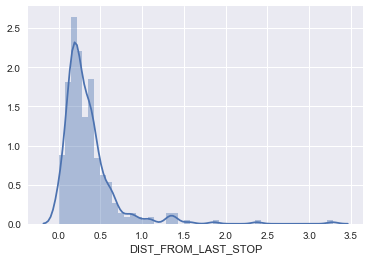

In [738]:
sns.distplot(data.DIST_FROM_LAST_STOP)

In [739]:
data['DIST_FROM_LAST_STOP_LOG'] = data['DIST_FROM_LAST_STOP'].apply(lambda value: np.log(value + 1))

In [740]:
data['SERVMILES_S_LOG'] = data['SERVMILES_S'].apply(lambda x : np.log(x + 1))

In [741]:
data['CAL_STATION'] = np.where(data['CALTRAIN_AVG'] > 0,1,0)


In [742]:
#this should be 0.5 for quarter mile buffers and .2 for tenth
data['CLOSE_STOP'] = np.where(data['DIST_FROM_LAST_STOP'] < 0.5, 1,0)

In [743]:
data['EOL_SOL'] = data['EOL'] + data['SOL']

In [758]:
def set_underground(value,stop_list):
    if value in stop_list:
        under = 1
    else:
        under = 0
    return under

stop_list = [6996,6995,5417,5731,6994,5730,6992,7217,6997,5727]

data_quart['UNDERGROUND'] = data_quart.STOP_ID.apply(lambda value: set_underground(value,stop_list))

estimate[(estimate['ROUTE_SHORT_NAME'] =='J')& (estimate['EXCLUDE'] == 1)]

,ROUTE_SHORT_NAME,STOP_ID,DIR,SEQ,HEADWAY_S,EOL,SOL,DWELL_S,RUNTIME_S,TOTTIME_S,SERVMILES_S,RUNSPEED_S,TOTSPEED_S,Route,STOP,Boardings,Alightings,STOP NAME_x,STOP NAME_y,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_OFF,CALTRAIN_ON,ON_BUS,HEADWAY_S_BUS,ONTIME5_BUS,OFF_BUS,NUM_BUS_STOPS,EDD_EMP,geometry_d,Alightings_e,Boardings_e,DIR_e,DWELL_S_e,EOL_e,HEADWAY_S_e,ROUTE_SHOR,RUNSPEED_S_e,RUNTIME_S_e,Route_e,SEQ_e,SERVMILES_,SOL_e,STOP_e,STOP_NAME,Sum_Id,Sum_Value,TOTSPEED_S_e,TOTTIME_S_e,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE


In [701]:
# Run 1
# Start with the final model for the bus ridership switching the muni and rail varaible places and eliminating
# variables that only could be obtained using the bus data
# -- good R-squared, but poor p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     996.8
Date:                Tue, 25 Jul 2017   Prob (F-statistic):          7.87e-233
Time:                        17:34:12   Log-Likelihood:                -436.14
No. Observations:                 318   AIC:                             894.3
Df Residuals:                     307   BIC:                             935.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [702]:
# Run 2
# BART seems to causing the most trouble try the untransformed variable 
# -- made it worse, keep run 1

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     996.9
Date:                Tue, 25 Jul 2017   Prob (F-statistic):          7.68e-233
Time:                        17:34:13   Log-Likelihood:                -436.11
No. Observations:                 318   AIC:                             894.2
Df Residuals:                     307   BIC:                             935.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [241]:
# Run 3
# Try BART Boardings 
# -- made it worse, keep run 1

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + BART_FROMS \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1530.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          9.33e-210
Time:                        15:54:40   Log-Likelihood:                -276.23
No. Observations:                 248   AIC:                             572.5
Df Residuals:                     238   BIC:                             607.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [242]:
# Run 4-6
# Try without BART Variable and try without Transbay and without both, compare to run 1
# -- 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:40   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [243]:
# Run 5

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1527.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.14e-209
Time:                        15:54:40   Log-Likelihood:                -276.43
No. Observations:                 248   AIC:                             572.9
Df Residuals:                     238   BIC:                             608.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [244]:
# Run 6
# Try without BART Variable and try without Transbay and without both, compare to run 1
# -- Both variables do not have a significant impact on the gof measures, so drop them both and stick with this


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:41   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [245]:
# Run 7-11
# Cal station is negative and non-significant try different variations of this variable
#Try the untransformed Boardings
# -- reject b/c poor p-value
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CALTRAIN_ON \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:41   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [246]:
# Run 8
# Try the untransformed Avg Ridership, compare to run 6
# -- reject b/c of poor p value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CALTRAIN_AVG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:41   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [247]:
# Run 9
# Try the transformed Avg Ridership, compare to run 6
# -- reject b/c of poor p value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CALTRAIN_AVG_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:41   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [248]:
# Run 10
# Try the transformed Boardings, compare to run 6
# -- reject b/c of poor p value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CALTRAIN_ON_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:41   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [249]:
# Run 11
# Try without a Caltrain variable, compare to run 6
# -- Does not impact gof measures much, stick with this moving forward

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1910.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.54e-212
Time:                        15:54:42   Log-Likelihood:                -277.43
No. Observations:                 248   AIC:                             570.9
Df Residuals:                     240   BIC:                             599.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [250]:
# Run 12
# Try dropping close stop variable, because it does not make as much sense with rail (no limited/rapid lines)
# reject b/c gof measures drops and EOL_SOL is affected

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2105.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.76e-212
Time:                        15:54:42   Log-Likelihood:                -282.34
No. Observations:                 248   AIC:                             578.7
Df Residuals:                     241   BIC:                             603.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [413]:
# Run 13
# Try dropping EOL_SOL, because there may be some double play going on with the EOL/SOL always not having 
# a close stop nearby, compare to run 11

# -- gof measures are not impacted much, and the p-values all look good use this as the final tenth-mile model

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + MUNI_BUS_AVG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2454.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.32e-213
Time:                        17:01:47   Log-Likelihood:                -282.96
No. Observations:                 248   AIC:                             577.9
Df Residuals:                     242   BIC:                             599.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [418]:
# Run 14
# Try adding the travel time varaible in 
# -- the p-value for income is iffy and travel time is not only using rail

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + MUNI_BUS_AVG \
                       + AVG_TT_TO_WORK_MINUTES \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2227.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          4.77e-215
Time:                        17:15:51   Log-Likelihood:                -275.48
No. Observations:                 248   AIC:                             565.0
Df Residuals:                     241   BIC:                             589.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [419]:
# Run 14
# Final Model (Tenth-mile Buffer)

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + MUNI_BUS_AVG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2454.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.32e-213
Time:                        17:19:53   Log-Likelihood:                -282.96
No. Observations:                 248   AIC:                             577.9
Df Residuals:                     242   BIC:                             599.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

# Quarter-Mile Buffer Model

## Changed input file in first cell and ran through them again to get the transformed data

In [745]:
data_quart = data

In [746]:
data_quart.head()

,ROUTE_SHORT_NAME,STOP_ID,DIR,SEQ,HEADWAY_S,EOL,SOL,DWELL_S,RUNTIME_S,TOTTIME_S,SERVMILES_S,RUNSPEED_S,TOTSPEED_S,Route,STOP,Boardings,Alightings,STOP NAME_x,STOP NAME_y,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_OFF,CALTRAIN_ON,ON_BUS,HEADWAY_S_BUS,ONTIME5_BUS,OFF_BUS,NUM_BUS_STOPS,EDD_EMP,geometry_d,Alightings_e,Boardings_e,DIR_e,DWELL_S_e,EOL_e,HEADWAY_S_e,ROUTE_SHOR,RUNSPEED_S_e,RUNTIME_S_e,Route_e,SEQ_e,SERVMILES_,SOL_e,STOP_e,STOP_NAME,Sum_Id,Sum_Value,TOTSPEED_S_e,TOTTIME_S_e,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_BUS_AVG,PARK_12_HR_OFF_PUB_LOG,PARK_1_HR_OFF_PUB_LOG,PARK_2_HR_OFF_PUB_LOG,PARK_3_HR_OFF_PUB_LOG,PARK_4_HR_OFF_PUB_LOG,AVG_BART_LOG,AVG_HH_SIZE_LOG,AVG_TT_TO_WORK_MINUTES_LOG,BART_FROMS_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,PARK_DAY_DISCOUNT_OFF_PUB_LOG,PARK_DAY_OFF_PUB_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FREQ_S_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,PARK_HOURLY_AVG_ON_LOG,HOUSING_09_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_BUS_LOG,ON_BUS_LOG,ONTIME5_BUS_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,POP_DEN_ACS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_S_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_S_LOG,TOTTIME_S_LOG,Total_Housing_Units_LOG,Total_Pop_LOG,VAC_RATE_LOG,DIST_FROM_LAST_STOP,DIST_FROM_LAST_STOP_LOG,SERVMILES_S_LOG,CAL_STATION,CLOSE_STOP,EOL_SOL,UNDERGROUND
0,J,3537,1,31.0,16.494541,0.0,0.0,0.0,118.166667,118.166667,21.122000,10.726667,10.726667,J-CHURCH,30th&Dolores,132,58,30th St & Dolores St,30th St & Dolores St,5393,2731,0.134017,0.865983,2.280338,44.138158,19.355970,22.351439,0.0,0.0,0.0,0.0,6227.275331,18.818346,0.617455,6073.213990,5,1198,POLYGON ((-122.4179404432807 37.74240321003582...,58,132,1,0.0,0.0,16.494541,J,10.726667,118.166667,J-CHURCH,31.0,21.122000,0.0,30th&Dolores,30th St & Dolores St,0,0,10.726667,118.166667,3.637567,0.0,0,633.896328,133.931166,2850.425740,866.249979,2450.526804,349.580161,189.429435,1666.143426,317.305880,0.156871,0.040592,0.539535,0.142072,0.277801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.805825,225.583498,28.6,0.916922,0,95.0,4.564348,0.0,0.0,6150.244661,NaN,NaN,NaN,NaN,NaN,0.0,1.187947,3.387774,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,7.089243,6.453462,4.904765,7.955574,6.765327,1.534190,2.861889,3.013374,0.0,7.804466,3.150659,5.859589,5.249282,1.791759,0.623788,8.711808,8.736855,0.480854,7.418867,5.763013,0.650721,3.809728,5.307306,5.423114,2.461865,4.780523,0.145719,0.039790,0.431480,0.132844,0.245141,2.461865,4.780523,7.912789,8.593043,0.125766,0.241943,0.216677,3.096573,0,1,0.0,0
1,J,3538,0,30.0,11.844587,0.0,0.0,0.0,103.073333,103.073333,13.884000,8.210000,8.210000,J-CHURCH,30th&Dolores,60,170,30th St & Dolores St,30th St & Dolores St,4462,1978,0.034884,0.965116,2.337349,36.016741,15.409224,15.966184,0.0,0.0,0.0,0.0,5729.213775,19.630164,0.623327,5910.024724,5,1190,POLYGON ((-122.4183714548281 37.74226923229441...,170,60,0,0.0,0.0,11.844587,J,8.210000,103.073333,J-CHURCH,30.0,13.884000,0.0,30th&Dolores,30th St & Dolores St,0,0,8.210000,103.073333,5.065605,0.0,0,629.026208,132.959864,2820.259575,832.679927,2411.563674,338.881227,169.096558,1657.247856,311.596122,0.108434,0.049764,0.477737,0.161865,0.310634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.104284,219.027383,29.1,0.949750,0,115.0

In [300]:
# Run 1
# Start with the final model for the bus ridership switching the muni and rail varaible places and eliminating
# variables that only could be obtained using the bus data
# -- good R-squared, but poor p-values


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1275.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.22e-204
Time:                        16:00:31   Log-Likelihood:                -287.86
No. Observations:                 249   AIC:                             597.7
Df Residuals:                     238   BIC:                             636.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [311]:
# Run 2-6
# Drop all of the hgihly-insignificant variables and add back one at a time

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.56e-210
Time:                        16:09:18   Log-Likelihood:                -290.16
No. Observations:                 249   AIC:                             594.3
Df Residuals:                     242   BIC:                             618.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1722      0

In [316]:
# Run 3
# Add back income variable
# -- reject b/c of poor p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1744.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.45e-208
Time:                        16:12:25   Log-Likelihood:                -290.02
No. Observations:                 249   AIC:                             596.0
Df Residuals:                     241   BIC:                             624.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1660      0

In [317]:
# Run 4
# Add back parking variable
# -- reject b/c of poor p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1748.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.10e-208
Time:                        16:12:26   Log-Likelihood:                -289.73
No. Observations:                 249   AIC:                             595.5
Df Residuals:                     241   BIC:                             623.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [319]:
# Run 5
# Add back  variable
# -- reject b/c of poor p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1748.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.10e-208
Time:                        16:13:53   Log-Likelihood:                -289.73
No. Observations:                 249   AIC:                             595.5
Df Residuals:                     241   BIC:                             623.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [322]:
# Run 6
# Add back caltrain station variable
# -- reject b/c of poor p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.56e-210
Time:                        16:14:29   Log-Likelihood:                -290.16
No. Observations:                 249   AIC:                             594.3
Df Residuals:                     242   BIC:                             618.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1722      0

In [328]:
# Stick with run 2, b/c the p-values all look good and the gof measures do not drop signifcantly 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.56e-210
Time:                        16:18:45   Log-Likelihood:                -290.16
No. Observations:                 249   AIC:                             594.3
Df Residuals:                     242   BIC:                             618.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1722      0

In [329]:
# Run 7
# Try adding Mid-high income variable
# p-value is close, keep this for now b/c of interesting effect that higher income has on rail ridership

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1766.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.30e-209
Time:                        16:20:34   Log-Likelihood:                -288.49
No. Observations:                 249   AIC:                             593.0
Df Residuals:                     241   BIC:                             621.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1864      0

In [335]:
# Run 8-10
# Try adding Parking variable
# try residential parking 

# reject b/c of high p-values with other variables and neg coeff

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1497.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          9.66e-182
Time:                        16:26:04   Log-Likelihood:                -232.49
No. Observations:                 214   AIC:                             483.0
Df Residuals:                     205   BIC:                             513.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EDD_EMP_LOG     

In [340]:
# Run 8
# Try adding off-street public parking
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + PARK_1_HR_OFF_PUB \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2214.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):           3.92e-32
Time:                        16:27:14   Log-Likelihood:                -2.3859
No. Observations:                  31   AIC:                             18.77
Df Residuals:                      24   BIC:                             28.81
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2524      0

In [342]:
# Run 9
# Try adding off-street public parking
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + PARK_4_HR_OFF_PUB \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2210.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):           4.00e-32
Time:                        16:27:48   Log-Likelihood:                -2.4120
No. Observations:                  31   AIC:                             18.82
Df Residuals:                      24   BIC:                             28.86
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2799      0

In [343]:
# Run 10
# Try adding off-street public parking

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1766.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.30e-209
Time:                        16:27:51   Log-Likelihood:                -288.49
No. Observations:                 249   AIC:                             593.0
Df Residuals:                     241   BIC:                             621.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1864      0

In [345]:
# Revert back to run 7 without a parking varaible

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1766.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.30e-209
Time:                        16:29:36   Log-Likelihood:                -288.49
No. Observations:                 249   AIC:                             593.0
Df Residuals:                     241   BIC:                             621.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1864      0

In [346]:
# Run 11-13
# try adding in caltrain variables 
#try caltrain boardings
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + CALTRAIN_ON \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1578.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          4.87e-208
Time:                        16:30:26   Log-Likelihood:                -287.37
No. Observations:                 249   AIC:                             592.7
Df Residuals:                     240   BIC:                             624.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1822      0

In [347]:
# Run 12
#try caltrain average ridership 
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + CALTRAIN_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1578.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          4.87e-208
Time:                        16:31:01   Log-Likelihood:                -287.37
No. Observations:                 249   AIC:                             592.7
Df Residuals:                     240   BIC:                             624.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1822      0

In [349]:
# Run 13
#try caltrain average ridership log transformed varaible 
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + CALTRAIN_AVG_LOG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1576.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          5.79e-208
Time:                        16:31:24   Log-Likelihood:                -287.55
No. Observations:                 249   AIC:                             593.1
Df Residuals:                     240   BIC:                             624.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1833      0

In [350]:
# Run 13
#try caltrain boardings log transformed varaible 
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + CALTRAIN_ON_LOG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1575.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          6.00e-208
Time:                        16:31:45   Log-Likelihood:                -287.59
No. Observations:                 249   AIC:                             593.2
Df Residuals:                     240   BIC:                             624.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1835      0

In [351]:
# Revert back to run 7 without a caltrain variable

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1766.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.30e-209
Time:                        16:32:25   Log-Likelihood:                -288.49
No. Observations:                 249   AIC:                             593.0
Df Residuals:                     241   BIC:                             621.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1864      0

In [357]:
# Run 14
# drop out the income variable
# gof measure does drop, but there are not any p-values above 0.05 
# keep run 7 because I like the income varaible

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.56e-210
Time:                        16:40:15   Log-Likelihood:                -290.16
No. Observations:                 249   AIC:                             594.3
Df Residuals:                     242   BIC:                             618.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1722      0

In [361]:
# Run 15
# add in the average tt to work varaible, compare to run 7

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + AVG_TT_TO_WORK_MINUTES \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1576.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          5.56e-208
Time:                        16:47:57   Log-Likelihood:                -287.51
No. Observations:                 249   AIC:                             593.0
Df Residuals:                     240   BIC:                             624.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [366]:
# Run 16
# drop out the income varaible, but add the travel time varaible, compare to runs 7 and 14
# stick with this, I like the travel time varaible flipping signs with the bus model

# update added the travel time varaible to the bus model and the sign is negative, which follows my intuition 
    # of busses being used for short distance travel and rail being used for longer distances

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + AVG_TT_TO_WORK_MINUTES \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1769.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          2.70e-209
Time:                        16:53:18   Log-Likelihood:                -288.28
No. Observations:                 249   AIC:                             592.6
Df Residuals:                     241   BIC:                             620.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [463]:
# Run 17
# drop out the travel time variable, it is not mode specific
# stick with this moving forward

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1916.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          5.75e-208
Time:                        17:33:11   Log-Likelihood:                -295.39
No. Observations:                 249   AIC:                             604.8
Df Residuals:                     242   BIC:                             629.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2113      0

In [465]:
data_quart['SHR_INCOME_50P'] = data_quart.SHR_INCOME_100P + data_quart.SHR_INCOME_50_100
data_quart['SHR_INCOME_50P_LOG'] = data_quart.SHR_INCOME_50P.apply(lambda x: np.log(x+1))

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [467]:
# Run 18
# try adding in 50P income variable 
# -- reject because of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50P_LOG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1680.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.25e-206
Time:                        17:39:23   Log-Likelihood:                -294.63
No. Observations:                 249   AIC:                             605.3
Df Residuals:                     241   BIC:                             633.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2013      0

In [753]:
def set_route_dummy(row,route):
    if row == route:
        value = 1
    else:
        value = 0
    return value

In [754]:
for name in data_quart.ROUTE_SHORT_NAME:
    data_quart[name] = data_quart['ROUTE_SHORT_NAME'].apply(lambda row: set_route_dummy(row,name))

In [485]:
data_quart[data_quart['ROUTE_SHORT_NAME'] == 'J']

,ROUTE_SHORT_NAME,STOP_ID,DIR,SEQ,HEADWAY_S,EOL,SOL,DWELL_S,RUNTIME_S,TOTTIME_S,SERVMILES_S,RUNSPEED_S,TOTSPEED_S,Route,STOP,Boardings,Alightings,STOP NAME_x,STOP NAME_y,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_OFF,CALTRAIN_ON,ON_BUS,HEADWAY_S_BUS,ONTIME5_BUS,OFF_BUS,NUM_BUS_STOPS,EDD_EMP,geometry_d,Alightings_e,Boardings_e,DIR_e,DWELL_S_e,EOL_e,HEADWAY_S_e,ROUTE_SHOR,RUNSPEED_S_e,RUNTIME_S_e,Route_e,SEQ_e,SERVMILES_,SOL_e,STOP_e,STOP_NAME,Sum_Id,Sum_Value,TOTSPEED_S_e,TOTTIME_S_e,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_BUS_AVG,PARK_12_HR_OFF_PUB_LOG,PARK_1_HR_OFF_PUB_LOG,PARK_2_HR_OFF_PUB_LOG,PARK_3_HR_OFF_PUB_LOG,PARK_4_HR_OFF_PUB_LOG,AVG_BART_LOG,AVG_HH_SIZE_LOG,AVG_TT_TO_WORK_MINUTES_LOG,BART_FROMS_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,PARK_DAY_DISCOUNT_OFF_PUB_LOG,PARK_DAY_OFF_PUB_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FREQ_S_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,PARK_HOURLY_AVG_ON_LOG,HOUSING_09_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_BUS_LOG,ON_BUS_LOG,ONTIME5_BUS_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,POP_DEN_ACS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_S_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_S_LOG,TOTTIME_S_LOG,Total_Housing_Units_LOG,Total_Pop_LOG,VAC_RATE_LOG,DIST_FROM_LAST_STOP,DIST_FROM_LAST_STOP_LOG,SERVMILES_S_LOG,CAL_STATION,CLOSE_STOP,EOL_SOL,SHR_INCOME_50P,SHR_INCOME_50P_LOG,J,KT,L,M,N
2,J,3984,0,19.0,11.952080,0.000000,0.000000,0.0,196.470000,196.470000,26.061000,7.960000,7.960000,J-CHURCH,Church&16th,232,284,Church St & 16th St,Church St & 16th St,3151,1817,0.105669,0.894331,1.939077,44.575017,22.987751,25.703842,0.0,0.0,0.0,0.0,2821.660012,19.940003,0.709521,2616.738748,12,3078,POLYGON ((-122.4226346215173 37.76472045210242...,284,232,0,0.0,0.000000,11.952080,J,7.960000,196.470000,J-CHURCH,19.0,26.061000,0.000000,Church&16th,Church St & 16th St,0,0,7.960000,196.470000,5.020047,0.0,0,691.873708,372.802523,3490.401978,1974.107566,3599.814424,486.532841,654.519996,2088.055658,768.925993,0.311385,0.033231,0.436308,0.174154,0.356308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.939771,177.859055,25.4,0.821434,0,258.0,5.556828,0.0,0.0,2719.199380,NaN,NaN,NaN,NaN,NaN,0.000000,1.078096,3.273364,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,0.0,8.032360,6.540848,5.923728,8.158059,7.588378,1.795095,2.561256,3.177543,0.000000,8.188915,3.284807,6.189358,6.485429,2.564949,0.638866,7.870066,7.945435,0.536213,7.644467,6.646294,0.599624,3.819360,5.415833,5.186598,2.192770,5.285587,0.271084,0.032691,0.362076,0.160548,0.304766,2.192770,5.285587,7.505492,8.055792,0.100450,0.216308,0.195820,3.298094,0,1,0.000000,0.792615,0.583676,1,0,0,0,0
15,J,4006,1,44.0,16.241226,0.333333,0.000000,0.0,124.513333,124.513333,16.379333,7.890000,7.890000,J-CHURCH,Duboce&Church,642,385,Church St & Duboce Ave,Church St & Duboce Ave,3619,1831,0.028946,0.971054,2.035433,49.782441,24.457911,25.186972,0.0,0.0,0.0,0.0,4809.324489,20.660876,0.714613,4460.313671,12,2257,POLYGON ((-122.4229992384349 37.76940147085892...,385,642,1,0.0,0.333333,16.241226,J,7.890000,124.513333,J-CHURCH,44.0,16.379333,0.000000,Duboce&Church,Church St & Duboce Ave,0,0,7.890000,124.513333,3.694302,200.0,0,748.732235,77.416694,3755.376347,1987.813394,3760.773395,541.926845,694.675778,2218.

In [489]:
# Run 19
# try adding in the EOL and SOL
# -- reject because of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1682.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.07e-206
Time:                        17:47:46   Log-Likelihood:                -294.46
No. Observations:                 249   AIC:                             604.9
Df Residuals:                     241   BIC:                             633.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2040      0

In [496]:
data_quart.ROUTE_SHORT_NAME.unique()

array(['J', 'KT', 'L', 'M', 'N'], dtype=object)

In [500]:
# Run 20
# try keeping SOL_EOL and dropping transbay, compare to run 17
# keep this for now, decent p-values and keeps the EOL_SOL variable, stick with this

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1898.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.70e-207
Time:                        17:56:27   Log-Likelihood:                -296.51
No. Observations:                 249   AIC:                             607.0
Df Residuals:                     242   BIC:                             631.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2289      0

In [503]:
# Run 21
# add in cat variables for each route
# reject because of gof measures

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       + J \
                       + KT \
                       + L \
                       + M \
                       + N \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     16.63
Date:                Mon, 24 Jul 2017   Prob (F-statistic):           4.17e-24
Time:                        17:56:55   Log-Likelihood:                -284.31
No. Observations:                 249   AIC:                             592.6
Df Residuals:                     237   BIC:                             634.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1457      0

In [517]:
# Run 21
# add in cat variables for each route
# reject because of gof measures

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       + J \
                       + KT \
                       + L \
                       + M \
                       + N \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     18.14
Date:                Mon, 24 Jul 2017   Prob (F-statistic):           1.72e-24
Time:                        18:03:53   Log-Likelihood:                -284.97
No. Observations:                 249   AIC:                             591.9
Df Residuals:                     238   BIC:                             630.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1503      0

In [521]:
# Run 22
# try just a couple of routes
# -- reject b/c of bad p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       + J \
                       + N \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1520.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          4.01e-206
Time:                        18:07:53   Log-Likelihood:                -291.95
No. Observations:                 249   AIC:                             601.9
Df Residuals:                     240   BIC:                             633.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2191      0

In [522]:
# Run 23
# try just route J
# -- reject b/c of bad p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       + J \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1700.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.17e-207
Time:                        18:07:58   Log-Likelihood:                -293.21
No. Observations:                 249   AIC:                             602.4
Df Residuals:                     241   BIC:                             630.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2275      0

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [533]:
# Run 24
# add in underground dummy variable
# -- reject because of gof measures and p-values


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + UNDERGROUND \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1682.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.04e-206
Time:                        18:17:41   Log-Likelihood:                -294.44
No. Observations:                 249   AIC:                             604.9
Df Residuals:                     241   BIC:                             633.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2131      0

In [534]:
# Rerun 20
# this is the final model


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1898.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.70e-207
Time:                        18:19:06   Log-Likelihood:                -296.51
No. Observations:                 249   AIC:                             607.0
Df Residuals:                     242   BIC:                             631.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2289      0

In [575]:
# Rerun 20
# this is the final model


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG ",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     24.07
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           9.97e-25
Time:                        11:36:08   Log-Likelihood:                -289.51
No. Observations:                 249   AIC:                             595.0
Df Residuals:                     241   BIC:                             623.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.6651      0

In [578]:
# Rerun 20
# this is the final model


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + UNDERGROUND ",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     21.99
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           5.21e-25
Time:                        11:51:31   Log-Likelihood:                -287.06
No. Observations:                 249   AIC:                             592.1
Df Residuals:                     240   BIC:                             623.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.7147      0

In [579]:
# Rerun 20
# this is the final model


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + UNDERGROUND \
                       + J \
                       + KT \
                       + L \
                       + M \
                       + N \
                       - 1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     15.99
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           1.32e-24
Time:                        11:53:23   Log-Likelihood:                -281.43
No. Observations:                 249   AIC:                             588.9
Df Residuals:                     236   BIC:                             634.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1255      0

In [580]:
# Rerun 20
# 


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + UNDERGROUND \
                       + KT \
                       + L \
                       + M \
                       + N ",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     15.99
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           1.32e-24
Time:                        11:54:07   Log-Likelihood:                -281.43
No. Observations:                 249   AIC:                             588.9
Df Residuals:                     236   BIC:                             634.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4000      0

In [582]:
# Rerun 20



mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + N ",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     22.56
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           1.49e-25
Time:                        11:55:04   Log-Likelihood:                -285.71
No. Observations:                 249   AIC:                             589.4
Df Residuals:                     240   BIC:                             621.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.0221      0

In [583]:
# Rerun 20
# this is the final model -- 


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG ",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     24.07
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           9.97e-25
Time:                        11:55:33   Log-Likelihood:                -289.51
No. Observations:                 249   AIC:                             595.0
Df Residuals:                     241   BIC:                             623.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.6651      0

In [586]:
data[data['AVG_RIDE']==0]

,ROUTE_SHORT_NAME,STOP_ID,DIR,SEQ,HEADWAY_S,EOL,SOL,DWELL_S,RUNTIME_S,TOTTIME_S,SERVMILES_S,RUNSPEED_S,TOTSPEED_S,Route,STOP,Boardings,Alightings,STOP NAME_x,STOP NAME_y,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_OFF,CALTRAIN_ON,ON_BUS,HEADWAY_S_BUS,ONTIME5_BUS,OFF_BUS,NUM_BUS_STOPS,EDD_EMP,geometry_d,Alightings_e,Boardings_e,DIR_e,DWELL_S_e,EOL_e,HEADWAY_S_e,ROUTE_SHOR,RUNSPEED_S_e,RUNTIME_S_e,Route_e,SEQ_e,SERVMILES_,SOL_e,STOP_e,STOP_NAME,Sum_Id,Sum_Value,TOTSPEED_S_e,TOTTIME_S_e,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_BUS_AVG,PARK_12_HR_OFF_PUB_LOG,PARK_1_HR_OFF_PUB_LOG,PARK_2_HR_OFF_PUB_LOG,PARK_3_HR_OFF_PUB_LOG,PARK_4_HR_OFF_PUB_LOG,AVG_BART_LOG,AVG_HH_SIZE_LOG,AVG_TT_TO_WORK_MINUTES_LOG,BART_FROMS_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,PARK_DAY_DISCOUNT_OFF_PUB_LOG,PARK_DAY_OFF_PUB_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FREQ_S_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,PARK_HOURLY_AVG_ON_LOG,HOUSING_09_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_BUS_LOG,ON_BUS_LOG,ONTIME5_BUS_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,POP_DEN_ACS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_S_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_S_LOG,TOTTIME_S_LOG,Total_Housing_Units_LOG,Total_Pop_LOG,VAC_RATE_LOG,DIST_FROM_LAST_STOP,DIST_FROM_LAST_STOP_LOG,SERVMILES_S_LOG,CAL_STATION,CLOSE_STOP,EOL_SOL,SHR_INCOME_50P,SHR_INCOME_50P_LOG,J,KT,L,M,N,UNDERGROUND
317,N,7318,1,23.0,20.160884,0.0,0.0,0.0,665.36,665.36,132.756,11.98,11.98,N-JUDAH,Tunnel Entry,0,0,Sunset Tunnel East Portal,Sunset Tunnel East Portal,3619,1831,0.028946,0.971054,2.035433,49.782441,24.457911,25.186972,0.0,0.0,0.0,0.0,4444.806447,19.924671,0.674564,3795.50002,11,3243,POLYGON ((-122.4269882575403 37.76923367684583...,0,0,1,0.0,0.0,20.160884,N,11.98,665.36,N-JUDAH,23.0,132.756,0.0,Tunnel Entry,Sunset Tunnel East Portal,0,0,11.98,665.36,2.97606,0.0,0,772.677377,1007.881594,3752.647086,2304.623506,3513.098545,514.00269,521.521804,2232.731884,494.943568,0.349269,0.064679,0.448819,0.209224,0.277278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.235136,280.276541,32.1,0.719507,0,0.0,0.0,0.0,0.0,4120.153234,NaN,NaN,NaN,NaN,NaN,0.0,1.110354,3.499533,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,8.084562,6.651155,6.916598,8.230483,7.743106,1.380291,3.052154,3.237027,0.0,8.164538,3.265262,6.244172,6.258667,2.484907,0.678568,8.241835,8.399717,0.515553,7.711429,6.206462,0.542038,3.927551,5.456325,5.639338,2.56341,6.50183,0.299563,0.062674,0.370749,0.189979,0.244731,2.56341,6.50183,7.513164,8.194229,0.028535,1.858666,1.050355,4.896017,0,0,0.0,0.726097,0.545863,0,0,0,0,1,0


In [588]:
# Rerun 20
# this is the final model -- 

data_quart = data_quart[data_quart['AVG_RIDE']>0]
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG ",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     34.87
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           2.46e-33
Time:                        11:58:54   Log-Likelihood:                -249.41
No. Observations:                 248   AIC:                             514.8
Df Residuals:                     240   BIC:                             542.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.6888      0

In [589]:
# Rerun 20
# this is the final model -- 

data_quart = data_quart[data_quart['AVG_RIDE']>0]
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       - 1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2555.
Date:                Tue, 25 Jul 2017   Prob (F-statistic):          3.91e-222
Time:                        12:00:18   Log-Likelihood:                -259.05
No. Observations:                 248   AIC:                             532.1
Df Residuals:                     241   BIC:                             556.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2267      0

In [590]:
# Rerun 20
# this is the final model -- 

data_quart = data_quart[data_quart['AVG_RIDE']>0]
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG ",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     34.86
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           2.51e-33
Time:                        12:01:40   Log-Likelihood:                -249.43
No. Observations:                 248   AIC:                             514.9
Df Residuals:                     240   BIC:                             543.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8243      0

In [591]:
# Rerun 20
# this is the final model -- 

data_quart = data_quart[data_quart['AVG_RIDE']>0]
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       - 1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2481.
Date:                Tue, 25 Jul 2017   Prob (F-statistic):          1.30e-220
Time:                        12:02:00   Log-Likelihood:                -262.67
No. Observations:                 248   AIC:                             539.3
Df Residuals:                     241   BIC:                             563.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2489      0

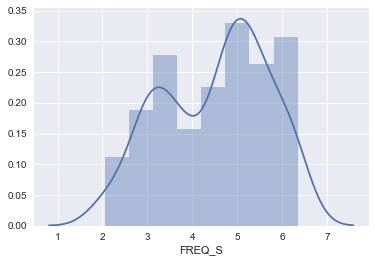

In [592]:
sns.distplot(data_quart['FREQ_S'])

In [593]:
# Rerun 20
# this is the final model -- 

data_quart = data_quart[data_quart['AVG_RIDE']>0]
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     30.39
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           1.49e-32
Time:                        12:56:17   Log-Likelihood:                -249.40
No. Observations:                 248   AIC:                             516.8
Df Residuals:                     239   BIC:                             548.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4825      1

In [595]:
# Rerun 20
# this is the final model -- 

data_quart['FREQ_S_GT4'] = data_quart['FREQ_S'].apply(lambda x : max(x-4, 0))

data_quart = data_quart[data_quart['AVG_RIDE']>0]
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S \
                       + FREQ_S_GT4 \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG",
             data = data_quart)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     30.39
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           1.49e-32
Time:                        12:57:42   Log-Likelihood:                -249.39
No. Observations:                 248   AIC:                             516.8
Df Residuals:                     239   BIC:                             548.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9024      0

In [596]:
# Rerun 20
# this is the final model -- 

data_quart['FREQ_S_GT2'] = data_quart['FREQ_S'].apply(lambda x : max(x-2, 0))

data_quart = data_quart[data_quart['AVG_RIDE']>0]
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S \
                       + FREQ_S_GT4 \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG",
             data = data_quart)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     30.39
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           1.49e-32
Time:                        12:58:18   Log-Likelihood:                -249.39
No. Observations:                 248   AIC:                             516.8
Df Residuals:                     239   BIC:                             548.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9024      0

In [597]:
# Rerun 20
# this is the final model -- 


data_quart = data_quart[data_quart['AVG_RIDE']>0]
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG",
             data = data_quart)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     34.87
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           2.46e-33
Time:                        12:58:46   Log-Likelihood:                -249.41
No. Observations:                 248   AIC:                             514.8
Df Residuals:                     240   BIC:                             542.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.6888      0

In [774]:
# Rerun 200
# what we ended with last time

data_quart = data_quart[data_quart['AVG_RIDE']>0]
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + UNDERGROUND ",
             data = data_quart)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     30.27
Date:                Wed, 26 Jul 2017   Prob (F-statistic):           1.01e-34
Time:                        13:21:05   Log-Likelihood:                -350.98
No. Observations:                 315   AIC:                             720.0
Df Residuals:                     306   BIC:                             753.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.7017      0

In [775]:
# Rerun 201
# drop the intercept

data_quart = data_quart[data_quart['AVG_RIDE']>0]
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + UNDERGROUND \
                       - 1",
             data = data_quart)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2199.
Date:                Wed, 26 Jul 2017   Prob (F-statistic):          5.33e-266
Time:                        13:22:10   Log-Likelihood:                -360.65
No. Observations:                 315   AIC:                             737.3
Df Residuals:                     307   BIC:                             767.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2365      0

In [777]:
# Rerun 202
# add line J in 
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + UNDERGROUND \
                       + J \
                       - 1",
             data = data_quart)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2154.
Date:                Wed, 26 Jul 2017   Prob (F-statistic):          7.45e-271
Time:                        13:22:40   Log-Likelihood:                -345.14
No. Observations:                 315   AIC:                             708.3
Df Residuals:                     306   BIC:                             742.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1992      0

In [780]:
# Rerun 20
# drop underground, use this as the final model 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + J \
                       - 1",
             data = data_quart)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2417.
Date:                Wed, 26 Jul 2017   Prob (F-statistic):          3.54e-272
Time:                        13:42:17   Log-Likelihood:                -346.04
No. Observations:                 315   AIC:                             708.1
Df Residuals:                     307   BIC:                             738.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2101      0

In [787]:
# Rerun 20
# drop underground, use this as the final model 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + J ",
             data = data_quart)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     35.53
Date:                Wed, 26 Jul 2017   Prob (F-statistic):           1.57e-39
Time:                        13:45:23   Log-Likelihood:                -339.32
No. Observations:                 315   AIC:                             696.6
Df Residuals:                     306   BIC:                             730.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.1822      0

In [ ]:
data_quart

In [788]:
data_quart.to_csv('E:/Transit-Casa-Alex/MUNI Rail/Output/Modeling/2009/Final_Model_Data.csv')

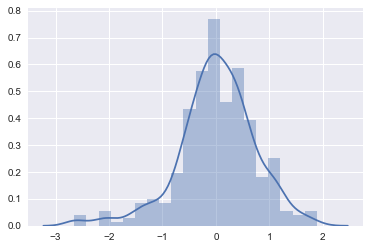

In [781]:
sns.distplot(res.resid)

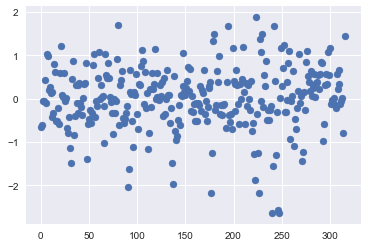

In [782]:
plt.scatter(res.resid.index,res.resid)

In [783]:
print(min(res.resid))
max(res.resid)

-2.64807686093


1.8868271733399888

In [784]:
res.resid

0     -0.644603
1     -0.606234
2     -0.048829
3     -0.048060
4      0.419197
5     -0.110741
6      1.037840
7      0.993903
8      0.207860
9      0.270103
10     0.138341
11     0.153738
12    -0.419094
13    -0.339396
14     0.806312
15     0.606688
16    -0.521534
17    -0.517985
18    -0.218386
19    -0.589349
20     0.593989
21     1.215818
22     0.075773
23     0.032697
24     0.600047
25    -0.051961
26     0.020582
27    -0.685415
28    -0.798088
29    -0.421425
         ...   
286    0.357164
287    0.376484
288    0.554575
289    0.214780
290    0.571473
291    0.855714
292    0.816422
293   -0.977343
294   -0.593865
295    0.313966
296    0.557702
297    0.329879
298    1.070897
299    0.539643
300    1.160893
301   -0.121370
302   -0.040552
303   -0.112863
304    0.006878
305   -0.140058
306   -0.222616
307    0.578884
308    0.226875
309    0.656202
310    0.328238
311   -0.128108
312   -0.063281
313    0.023430
314   -0.800287
316    1.437223
dtype: float64

In [614]:
# this is the large outlier in the bottom corner
data_quart[240:]

,ROUTE_SHORT_NAME,STOP_ID,DIR,SEQ,HEADWAY_S,EOL,SOL,DWELL_S,RUNTIME_S,TOTTIME_S,SERVMILES_S,RUNSPEED_S,TOTSPEED_S,Route,STOP,Boardings,Alightings,STOP NAME_x,STOP NAME_y,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_OFF,CALTRAIN_ON,ON_BUS,HEADWAY_S_BUS,ONTIME5_BUS,OFF_BUS,NUM_BUS_STOPS,EDD_EMP,geometry_d,Alightings_e,Boardings_e,DIR_e,DWELL_S_e,EOL_e,HEADWAY_S_e,ROUTE_SHOR,RUNSPEED_S_e,RUNTIME_S_e,Route_e,SEQ_e,SERVMILES_,SOL_e,STOP_e,STOP_NAME,Sum_Id,Sum_Value,TOTSPEED_S_e,TOTTIME_S_e,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_BUS_AVG,PARK_12_HR_OFF_PUB_LOG,PARK_1_HR_OFF_PUB_LOG,PARK_2_HR_OFF_PUB_LOG,PARK_3_HR_OFF_PUB_LOG,PARK_4_HR_OFF_PUB_LOG,AVG_BART_LOG,AVG_HH_SIZE_LOG,AVG_TT_TO_WORK_MINUTES_LOG,BART_FROMS_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,PARK_DAY_DISCOUNT_OFF_PUB_LOG,PARK_DAY_OFF_PUB_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FREQ_S_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,PARK_HOURLY_AVG_ON_LOG,HOUSING_09_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_BUS_LOG,ON_BUS_LOG,ONTIME5_BUS_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,POP_DEN_ACS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_S_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_S_LOG,TOTTIME_S_LOG,Total_Housing_Units_LOG,Total_Pop_LOG,VAC_RATE_LOG,DIST_FROM_LAST_STOP,DIST_FROM_LAST_STOP_LOG,SERVMILES_S_LOG,CAL_STATION,CLOSE_STOP,EOL_SOL,SHR_INCOME_50P,SHR_INCOME_50P_LOG,J,KT,L,M,N,UNDERGROUND,FREQ_S_GT4,FREQ_S_GT2
308,N,5731,1,50.0,14.323902,0.0,0.0,0.0,212.500000,212.500000,55.670333,15.720000,15.720000,N-JUDAH,MontgomerySta,591,3135,Metro Montgomery Station/Downtown,Metro Montgomery Station/Outbound,1054,1107,0.373080,0.626920,1.518732,7.576295,4.988566,7.957266,11240.0,11914.0,0.0,0.0,25262.655759,13.660272,0.617092,24364.007714,8,88154,"POLYGON ((-122.3958356121775 37.7888000678844,...",1188,91,1,0.0,0.000000,10.786636,J,15.686667,190.333333,J-CHURCH,50.0,49.763667,0.0,Montgmry Sta,Metro Montgomery Station/Outbound,0,1,15.686667,190.333333,4.188803,130.0,1,80.717648,4854.993867,488.880698,60325.563029,1571.995470,69.476156,6330.824820,304.743656,45505.827731,0.354467,0.008646,0.537464,0.324207,0.129683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.943238,3633.916612,20.9,NaN,0,1863.0,7.530480,11577.0,0.0,24813.331736,NaN,NaN,NaN,NaN,NaN,9.356862,0.923756,3.086487,9.385553,9.327323,0.0,0.0,0.0,NaN,NaN,0.0,11.386852,4.403270,8.487969,6.194162,11.007528,1.646503,2.729414,1.789852,4.875197,7.360737,2.192465,4.255274,8.753344,2.197225,0.486688,10.100903,10.137122,0.480629,5.722747,10.725618,NaN,2.149002,3.553725,8.198341,2.816606,5.363637,0.303408,0.008608,0.430134,0.280814,0.121937,2.816606,5.363637,7.010312,6.961296,0.317057,0.553761,0.440679,4.037251,0,0,0.0,0.667147,0.511114,0,0,0,0,1,1,0.188803,2.188803
309,N,6992,1,51.0,17.954887,0.0,1.0,0.0,221.986667,221.986667,57.690333,15.590000,15.590000,N-JUDAH,EmbarcaderoSta,1217,2665,Metro Embarcadero Station,Metro Embarcadero Station,1054,1107,0.373080,0.626920,1.518732,7.576295,4.988566,7.957266,8795.0,9083.0,0.0,0.0,19087.594039,14.670922,0.628875,16633.500114,8,86321,POLYGON ((-122.3903062407559 37.79324078228883...,1303,0,1,0.0,1.000000,11.459191,J,15.626667,199.473333,J-CHURCH,51.0,51.943667,0.0,Embarc Sta,Metro Embarcadero Station,0,1,15.626667,199.473333,3

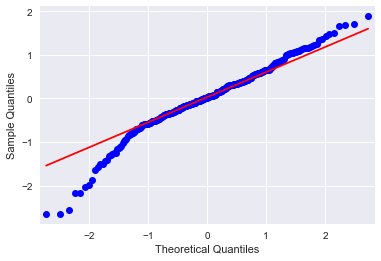

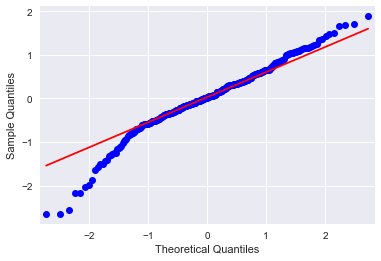

In [785]:
smf.graphics.qqplot(res.resid,line = 'q')

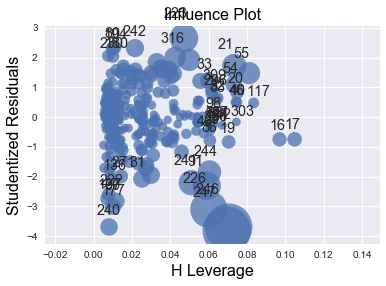

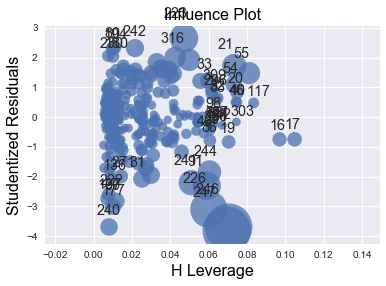

In [786]:
smf.graphics.influence_plot(res)

In [789]:
dropped = data_quart[['LOG_RIDERS','EDD_EMP_LOG','STOP_ID','AVG_RIDE','FREQ_S_LOG','EOL_SOL','HOUSING_09_DEN_LOG','MUNI_BUS_AVG','AVG_BART_LOG','CLOSE_STOP','J']].dropna()

In [790]:
dropped.to_csv('E:/Transit-Casa-Alex/MUNI Rail/Output/Modeling/2009/Final_Model_Data_Post_Drop.csv')